In [1]:


from matplotlib import pyplot as plt
"""
This notebook generates the figures presented in the paper. If other data should be used the paths in the cells need to be adapted
"""
import os
import sys

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    "axes.labelsize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "legend.fontsize": 7,
    "axes.grid" : True,
    "axes.linewidth": 0.75,
    "pgf.preamble": "\n".join([r'\usepackage{amsmath}', r'\usepackage{bm}', r'\usepackage{amsfonts}', r'\usepackage{amssymb}'])
})
plt.rc('text.latex', preamble=r'\usepackage{amsmath} \usepackage{bm} \usepackage{amsfonts} \usepackage{amssymb}')

parent_dir =  os.path.dirname(os.getcwd())

pts2inch = 1/72.27
ratio = 1.618
max_pts = 433
frac = 0.6

violations: tensor([0])
violations: tensor([0])
violations: tensor([0])


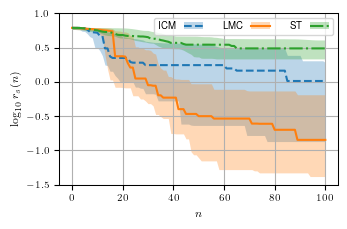

In [ ]:
import pickle
import torch


fig,ax = plt.subplots(1,figsize=(max_pts*frac*pts2inch,max_pts*frac/ratio*pts2inch))
files = [
    parent_dir+"/data/RKHS/ICM_dim4.obj",
         parent_dir+"/data/RKHS/LMC_dim4.obj",
         parent_dir+"/data/RKHS_ST/Single_Task_dim4.obj",
]

linestyles = ['--', '-', '-.']
glob_opt = pickle.load(open(parent_dir+"/data/RKHS/global_opt_dim4.obj",'rb')).detach()
def plot2(ax,str,i):
    if str.find('.obj') != -1:
        with open(str,'rb') as file:
            data = pickle.load(file)
            best_values = torch.tensor([y[-1] for y in data['bests']])
            best_values = abs(best_values - glob_opt.unsqueeze(-1))
            # stdy,muy = torch.std_mean(best_values,dim=0)
            q25, q75 = torch.quantile(best_values, 0.25, dim=0), torch.quantile(best_values, 0.75, dim=0)
            muy = torch.median(best_values,dim=0).values
            vios = 0
            for set in data['data_sets']:
                xt,tt,yt = tuple(set)
                xt0 = xt[tt.squeeze() == 0]
                yt0 = yt[tt.squeeze() == 0]
                vios += sum(-yt0>1)
            print(f"violations: {vios}")
    x = torch.arange(len(muy))
    fill = ax.fill_between(x,torch.log10(q25),torch.log10(q75),color=f"C{i}",alpha=.3, linewidth=0)
    line,= ax.plot(x,torch.log10(muy), color=f"C{i}",linestyle = linestyles[i])
    return (line,fill)

h = []
for i in range(len(files)):
    h.append(plot2(ax,files[i],i))

   
ax.legend(h,[r"ICM",r"LMC", "ST"], markerfirst=False, title_fontsize=7, loc='upper right', ncol=3)
ax.set_ylim(-1.5,1)
ax.set_xlabel(r"$n$")
ax.set_ylabel(r"$\log_{10} r_s(n)$")
plt.show()
fig.savefig(parent_dir+"/plots/rkhs_samps_comp_log.pdf", bbox_inches='tight')